In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 500)

In [2]:
df = pd.read_csv("tweet_data.csv")
df.head()

,tweetID,crDate,edInput,editor,engages,isApproved,isEdNeed,isRT,likes,photoUrl,retweets,rtUsID,text,topicName,usFlwrs,usID,usName,videoUrl
0,1070867471245164544,2018-12-07 02:27:55,-1,-1,98,False,True,False,64,https://pbs.twimg.com/media/Dtx8SiIWkAImVsb.jpg,34,-1,The immediate impulse for an alliance of the E...,Business,23464532,5988062,The Economist,NaN
1,1070868017888837633,2018-12-07 02:30:05,-1,-1,13,False,True,False,10,https://pbs.twimg.com/media/Dtx8yTyW4AEciqP.jpg,3,-1,America's economy is flashing some warning sig...,Business,1732809,16184358,CNN Business,NaN
2,1070868012864028673,2018-12-07 02:30:04,-1,-1,12,False,True,False,8,NaN,4,-1,Lyft files for what is expected to be one of t...,Business,2253989,25053299,FORTUNE,NaN
3,1070867995239555075,2018-12-07 02:30:00,-1,-1,5,False,True,False,4,NaN,1,-1,"Exporters still waiting to get Rs 6,000 crore ...",Business,1704056,43855487,Business Standard,NaN
4,1070867995205885952,2018-12-07 02:30:00,-1,-1,5,False,True,False,2,NaN,3,-1,Ride-hailing firm Lyft races to leave Uber beh...,Business,1997662,15110357,Reuters Business,https://video.twimg.com/amplify_video/10708116...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785916 entries, 0 to 785915
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   tweetID     785916 non-null  int64 
 1   crDate      785916 non-null  object
 2   edInput     785916 non-null  int64 
 3   editor      785916 non-null  int64 
 4   engages     785916 non-null  int64 
 5   isApproved  785916 non-null  bool  
 6   isEdNeed    785916 non-null  bool  
 7   isRT        785916 non-null  bool  
 8   likes       785916 non-null  int64 
 9   photoUrl    277896 non-null  object
 10  retweets    785916 non-null  int64 
 11  rtUsID      785916 non-null  int64 
 12  text        785916 non-null  object
 13  topicName   785916 non-null  object
 14  usFlwrs     785916 non-null  int64 
 15  usID        785916 non-null  int64 
 16  usName      785916 non-null  object
 17  videoUrl    140491 non-null  object
dtypes: bool(3), int64(9), object(6)
memory usage: 92.2+ MB


In [4]:
df.tail()

,tweetID,crDate,edInput,editor,engages,isApproved,isEdNeed,isRT,likes,photoUrl,retweets,rtUsID,text,topicName,usFlwrs,usID,usName,videoUrl
785911,1147325851614117888,2019-07-06 02:06:13,-1,-1,3,False,True,True,1,NaN,2,542154137,Relations are DIFFERENT\nnot DIFFICULT.,Motivational,85625,542154137,Wit & Wisdom 💯,NaN
785912,1153184058714624001,2019-07-22 06:04:39,-1,-1,867,False,True,True,561,https://pbs.twimg.com/media/EADuxohU8AAQo8G.jpg,306,858516111410647040,"""to live a creative life, we must lose our fea...",Interesting,208417,2920686840,DeepFeling™,NaN
785913,1153048802116292608,2019-07-21 21:07:11,-1,-1,4605,False,True,True,4253,NaN,352,3282859598,Who's your comic crush? https://t.co/H29dhXw3kf,Memes,7024207,436266454,Twitter Movies,https://video.twimg.com/amplify_video/11530474...
785914,1154063052997836801,2019-07-24 16:17:27,-1,-1,5638,True,True,False,4996,https://pbs.twimg.com/media/EAQOObJWwAASaxj.jpg,642,-1,"After a flight of 195 hours, 18 minutes, 35 se...",Random,32030797,11348282,NASA,NaN
785915,1073723027718688768,2018-12-14 23:34:53,-1,-1,4181,False,True,True,3282,https://pbs.twimg.com/media/DuahZZeUYAA7-55.jpg,899,2355808260,Scarface's Action Figure Tony Montana cutting ...,Photography,606924,2355808260,41 Strange,NaN


In [5]:
df = df[(df["edInput"] != -1) & (df["edInput"] != 3)]

In [6]:
df['edInput'] = df['edInput'].replace(4, 1)

In [7]:
unique_values = df['edInput'].unique()
print(unique_values)

[1 2]


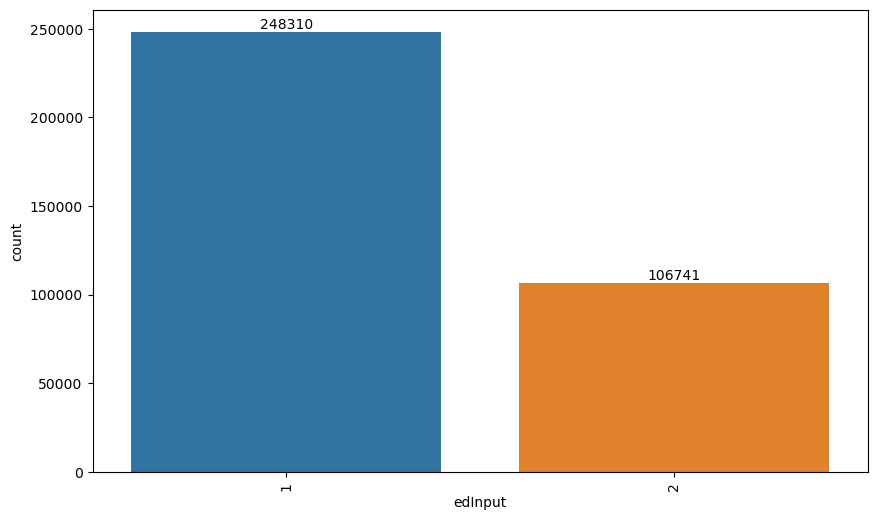

In [8]:
ax = sns.countplot(data =df, x ="edInput")
ax.bar_label(ax.containers[0])
plt.xticks(rotation =90);

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 355051 entries, 721 to 785872
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   tweetID     355051 non-null  int64 
 1   crDate      355051 non-null  object
 2   edInput     355051 non-null  int64 
 3   editor      355051 non-null  int64 
 4   engages     355051 non-null  int64 
 5   isApproved  355051 non-null  bool  
 6   isEdNeed    355051 non-null  bool  
 7   isRT        355051 non-null  bool  
 8   likes       355051 non-null  int64 
 9   photoUrl    137472 non-null  object
 10  retweets    355051 non-null  int64 
 11  rtUsID      355051 non-null  int64 
 12  text        355051 non-null  object
 13  topicName   355051 non-null  object
 14  usFlwrs     355051 non-null  int64 
 15  usID        355051 non-null  int64 
 16  usName      355051 non-null  object
 17  videoUrl    71622 non-null   object
dtypes: bool(3), int64(9), object(6)
memory usage: 44.4+ MB


In [10]:
df["edInput"].value_counts()

1    248310
2    106741
Name: edInput, dtype: int64

In [11]:
df=df.drop_duplicates()

In [12]:
pd.Series(df.edInput).value_counts(normalize=True)

1    0.699364
2    0.300636
Name: edInput, dtype: float64

## Cleaning Data

In [13]:
df2 = df.copy()

In [14]:
df2["text"].head()

721     Which one would you choose? 👀 https://t.co/U0s...
1374             How it’s made. 😊 https://t.co/3XjOw4gIkg
1867    Smile, because it confuses people. Smile, beca...
2206                 𝐶𝑙𝑎𝑢𝑑𝑒 𝑀𝑜𝑛𝑒𝑡 https://t.co/WdavWJcSyw
2263    Baby Alpacas are so under appreciated. https:/...
Name: text, dtype: object

## Cleaning Data

In [15]:
import re
s = "http\\:www.mynet.com #lateflight @airlines"
s = re.sub("http\S+", "", s).strip()          #http den sonra boşluk haricindekileri temizle  ("") getir..
s      

'#lateflight @airlines'

In [16]:
s = re.sub("#\S+", "", s)                    #ile başlayan ifadeyi temizle
s

' @airlines'

In [17]:
s = re.sub("@\S+", "", s)
s.strip()

''

In [18]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [20]:
stop_words = stopwords.words('english')

In [21]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def cleaning(data):
    import re
    
    #1. Removing URLS
    data = re.sub('http\S+', '', data).strip()
    data = re.sub('www\S+', '', data).strip()
    data = re.sub(r'^https?:\/\/.*[\r\n]*', '', data).strip()

    #2. Removing Tags
    data = re.sub('#\S+', '', data).strip()

    #3. Removing Mentions
    data = re.sub('@\S+', '', data).strip()
    
    #4. Removing upper brackets to keep negative auxiliary verbs in text
    data = data.replace("'", "")
    
    #5. Tokenize
    text_tokens = word_tokenize(data.lower())
    
    #6. Remove Puncs and number
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #7. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #8. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
    #joining
    return " ".join(text_cleaned)

# Örnek kullanım
text = "Bu bir örnek metindir."
cleaned_text = cleaning(text)
print(cleaned_text)


bu bir örnek metindir


In [22]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer


In [23]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [24]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [26]:
df2["text"] = cleaning_text


In [27]:
df2 =df2[["edInput", "text"]]
df2.head()

,edInput,text
721,1,one would choose
1374,1,made
1867,2,smile confuses people smile easier explaining ...
2206,1,𝐶𝑙𝑎𝑢𝑑𝑒 𝑀𝑜𝑛𝑒𝑡
2263,1,baby alpaca appreciated


In [28]:
# Metin sütununu küçük harfe dönüştüren bir işlev tanımlayalım
def to_lower(text):
    return text.lower()

# 'text' sütununa uygulayalım
df2['text'] = df2['text'].apply(to_lower)

print(df2)

        edInput                                               text
721           1                                   one would choose
1374          1                                               made
1867          2  smile confuses people smile easier explaining ...
2206          1                                       𝐶𝑙𝑎𝑢𝑑𝑒 𝑀𝑜𝑛𝑒𝑡
2263          1                            baby alpaca appreciated
...         ...                                                ...
785850        1  apply grant implement plant conservation botan...
785854        2                              team shake shack team
785863        1                          hedonistic dad helped art
785871        1  delighted offering special auction lot cook ho...
785872        1  btc dominance downtrend alt poppin congratz fa...

[355051 rows x 2 columns]


In [29]:


bards_words =["The fool doth think he is wise,",
              "but the wise man knows himself to be a fool"]



In [30]:


from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(bards_words)



CountVectorizer()

In [31]:


print("Vocabulary size: {}".format(len(vect.vocabulary_)))
print("Vocabulary content:\n {}".format(vect.vocabulary_))



Vocabulary size: 13
Vocabulary content:
 {'the': 9, 'fool': 3, 'doth': 2, 'think': 10, 'he': 4, 'is': 6, 'wise': 12, 'but': 1, 'man': 8, 'knows': 7, 'himself': 5, 'to': 11, 'be': 0}


In [32]:


bag_of_words = vect.transform(bards_words)
print("bag_of_words: {}".format(repr(bag_of_words)))



bag_of_words: <2x13 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>


In [33]:


print("Dense representation of bag_of_words:\n{}".format(
    bag_of_words.toarray()))



Dense representation of bag_of_words:
[[0 0 1 1 1 0 1 0 0 1 1 0 1]
 [1 1 0 1 0 1 0 1 1 1 0 1 1]]


In [34]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print("Number of stop words: {}".format(len(ENGLISH_STOP_WORDS)))
print("Every 10th stopword:\n{}".format(list(ENGLISH_STOP_WORDS)[::10]))


Number of stop words: 318
Every 10th stopword:
['describe', 'fire', 'several', 'made', 'ours', 'also', 'thereafter', 'somehow', 'part', 'thus', 'once', 'his', 'becomes', 'will', 'get', 'something', 'ltd', 'everything', 'am', 'all', 'thereby', 'thru', 'wherever', 'four', 'may', 'seemed', 'our', 'another', 'anyway', 'hereafter', 'those', 'around']


## Bag-of-word for movie reviews

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X = df2["text"]
y= df2["edInput"]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

In [49]:


vect = CountVectorizer().fit(df2['text'])
X_train = vect.transform(df2['text'])
print("X_train:\n{}".format(repr(X_train)))



X_train:
<355051x81619 sparse matrix of type '<class 'numpy.int64'>'
	with 3096608 stored elements in Compressed Sparse Row format>


In [39]:


feature_names = vect.get_feature_names_out()
print("Number of features: {}".format(len(feature_names)))
print("First 20 features:\n{}".format(feature_names[:20]))
print("Features 2010 to 2030:\n{}".format(feature_names[2010:2030]))
print("Every 2000th feature:\n{}".format(feature_names[::2000]))



Number of features: 74447
First 20 features:
['aa' 'aaa' 'aaaaaaaaa' 'aaaaaaaaahhhhhh' 'aaaaaaahhhh' 'aaaaand'
 'aaaahhhh' 'aaaall' 'aaaand' 'aaalll' 'aac' 'aadi' 'aaf' 'aagghhh'
 'aahhh' 'aai' 'aaiin' 'aak' 'aakers' 'aaksen']
Features 2010 to 2030:
['amantes' 'amanti' 'amanyangyun' 'amanze' 'amapola' 'amar' 'amara'
 'amaral' 'amaranthus' 'amarga' 'amarillo' 'amarjeet' 'amaro'
 'amaryllidaceae' 'amaryllis' 'amash' 'amashs' 'amass' 'amassed'
 'amassing']
Every 2000th feature:
['aa' 'amandebele' 'astonished' 'befallen' 'booooiii' 'calmed' 'choice'
 'consumption' 'danez' 'disagree' 'edra' 'expansively' 'foles' 'ghana'
 'haendel' 'holyoke' 'infecting' 'josep' 'krisjanis' 'litlanesfoss'
 'margareta' 'milked' 'myorchid' 'nyland' 'pallier' 'pissarro' 'psps'
 'regard' 'roord' 'sdm' 'sittard' 'squishy' 'swapping' 'tiger' 'uganda'
 'verse' 'wildsee' 'éloïse']


In [40]:
import numpy as np

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
scores = cross_val_score(LogisticRegression(), X_train, y_train, cv=5)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))



Mean cross-validation accuracy: 0.74


In [41]:


from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)



Best cross-validation score: 0.74
Best parameters:  {'C': 1}


In [42]:


X1_test = vect.transform(X_test)
print("Test score: {:.2f}".format(grid.score(X1_test, y_test)))




Test score: 0.74


## Tf-idf Vectorizor

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [44]:
# Metin sütununu küçük harfe dönüştüren bir işlev tanımlayalım
def to_lower(text):
    return text.lower()

# 'text' sütununa uygulayalım
df2['text'] = df2['text'].apply(to_lower)

print(df2)

        edInput                                               text
721           1                                   one would choose
1374          1                                               made
1867          2  smile confuses people smile easier explaining ...
2206          1                                       𝐶𝑙𝑎𝑢𝑑𝑒 𝑀𝑜𝑛𝑒𝑡
2263          1                            baby alpaca appreciated
...         ...                                                ...
785850        1  apply grant implement plant conservation botan...
785854        2                              team shake shack team
785863        1                          hedonistic dad helped art
785871        1  delighted offering special auction lot cook ho...
785872        1  btc dominance downtrend alt poppin congratz fa...

[355051 rows x 2 columns]


In [45]:
# DataFrame'inizi gözden geçirin
print(df2)

df2.loc[:, 'text'] = df2.loc[:, 'text'].apply(to_lower)



# DataFrame'inizi kontrol edin
print(df2)





        edInput                                               text
721           1                                   one would choose
1374          1                                               made
1867          2  smile confuses people smile easier explaining ...
2206          1                                       𝐶𝑙𝑎𝑢𝑑𝑒 𝑀𝑜𝑛𝑒𝑡
2263          1                            baby alpaca appreciated
...         ...                                                ...
785850        1  apply grant implement plant conservation botan...
785854        2                              team shake shack team
785863        1                          hedonistic dad helped art
785871        1  delighted offering special auction lot cook ho...
785872        1  btc dominance downtrend alt poppin congratz fa...

[355051 rows x 2 columns]
        edInput                                               text
721           1                                   one would choose
1374          1                    

In [48]:
tf_idf_vec = TfidfVectorizer(ngram_range = (1,1))
tf_idf_vec.fit(X_train)

AttributeError: lower not found